1) Visualize relationships between Wikipedia activity metrics using scatterplots
- (A) No. of eidts vs. No. of users
- (B) Size of edits vs. No. of users

2) Model these relationships using:
- mean ratio
- linear regressions

### Import libraries
1. pandas - Python Data Analysis
2. numpy - Numerical Python
3. matplotlib - Python Plotting Library
4. scipy - Python Library for Scientific Computing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

### Read CSV file with Wikipedia activity metrics

In [7]:
fn = 'output/wikipedia_metric.csv'
df = pd.read_csv(fn)

In [8]:
df.head()

,title,edits,size,users
0,50_Cent,13066,518204129,4557
1,Adele,6725,456912673,2672
2,Angelina_Jolie,7336,531496219,2902
3,Backstreet_Boys,10270,412497115,4050
4,Ben_Affleck,9263,906521569,3655


### A) Make scatterplot showing relationship between:
- No. of edits vs. No. of users

Define x and y variables

In [9]:
x = df['users']
y = df['edits']

Plot x vs y

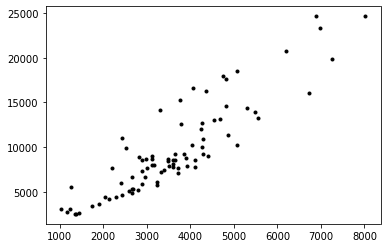

In [10]:
plt.plot(x, y, color='black', marker='.', linestyle='')

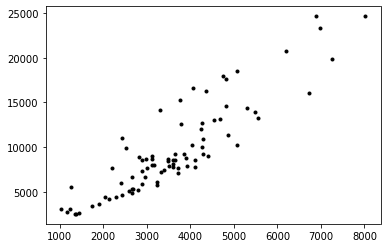

In [11]:
plt.plot(x, y, c='k', marker='.', ls='') # using keyword shortcuts

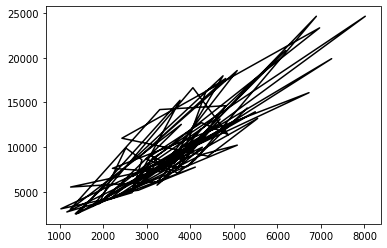

In [12]:
plt.plot(x, y, 'k') # using special shortcut: 'k' here means color black

Add axis labels, minor ticks in axes, and plot title

Text(0.5, 1.0, "Forbes 100 Celebrities' Wikipedia Pages")

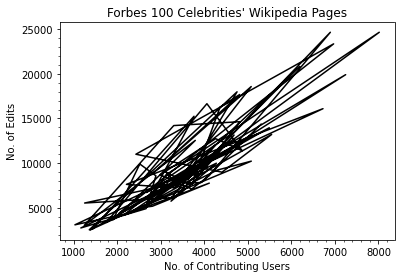

In [13]:
plt.plot(x, y, 'k')

# add axis labels
plt.xlabel('No. of Contributing Users')
plt.ylabel('No. of Edits')
plt.minorticks_on()
plt.title('Forbes 100 Celebrities\' Wikipedia Pages')

### Quantity the relationship using:
1. Mean Ratio

In [16]:
mean_ratio = np.mean(y/x)
mean_ratio

2.6093976569445583

### Overplay in plot the lin: y = mean_ratio * x

In [17]:
xx = np.linspace(800, 8400, 1000)
yy = mean_ratio * xx

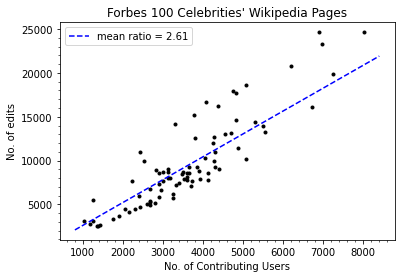

In [19]:
plt.plot(x, y, 'k.')
plt.plot(xx, yy, 'b--', label='mean ratio = %.2f' % mean_ratio)

# add axis labels
plt.xlabel('No. of Contributing Users')
plt.ylabel('No. of edits')
plt.minorticks_on()
plt.title('Forbes 100 Celebrities\' Wikipedia Pages')
plt.legend(loc='upper left', numpoints=1)

### Quantify the relationship using:
1. Linear Regression Fit: y vs . (x-mean(x))

In [21]:
x_mean = np.mean(x)
x_mean

3604.2073170731705

In [22]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x-x_mean, y)

In [23]:
slope, intercept

(3.17979447002623, 9626.134146341463)

In [24]:
r_value, p_value, std_err

(0.8905379922596317, 4.2851570848775055e-29, 0.18160425239314262)

### Overlay in plot the linear regression fit:
- y = slop * (x-x_mean) + intercept

In [25]:
xx_fit = xx - x_mean
yy_fit = slope * xx_fit + intercept

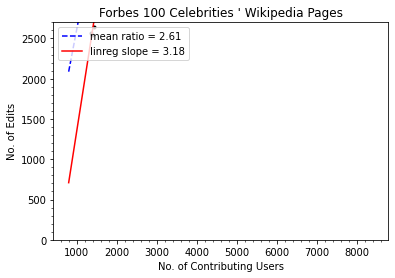

In [30]:
plt.plot(x, y, 'k.')
plt.plot(xx, yy, 'b--', label='mean ratio = %.2f' % mean_ratio)
plt.plot(xx, yy_fit, 'r-', label='linreg slope = %.2f' % slope)

# add axis labels
plt.xlabel('No. of Contributing Users')
plt.ylabel('No. of Edits')
plt.minorticks_on()
plt.title('Forbes 100 Celebrities \' Wikipedia Pages')
plt.legend(loc='upper left', numpoints=1)
plt.ylim(0, 2700)

# save to PNG file
plt.savefig('fig/fig_wikipedia_users_vs_no_of_edits.png')